**#Task 3: Linear Regression - Combined (Simple Linear + Multiple Linear Regression)**

In [6]:
#Step 1: Import Libraries and Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Load dataset
data = pd.read_csv('Housing.csv')
data.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [7]:
#Step 2: Preprocess the Data

#Checking missing values
print(data.isnull().sum())

#Simple Linear Regression Features
df_simple = data.copy()
X_simple = df_simple[['area']]
y_simple = df_simple['price']

#Multiple Linear Regression Features
features_multi = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
X_multi = data[features_multi]
y_multi = data['price']

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [8]:
#Step 3: Split Data into Train-Test Sets

#Simple Linear Regression Split
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(
    X_simple, y_simple, test_size=0.2, random_state=42
)

#Multiple Linear Regression Split
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi, y_multi, test_size=0.2, random_state=42
)

In [9]:
#Step 4: Train the Models

#Simple Linear Regression Model
simple_model = LinearRegression()
simple_model.fit(X_train_simple, y_train_simple)

#Multiple Linear Regression Model
multi_model = LinearRegression()
multi_model.fit(X_train_multi, y_train_multi)

LinearRegression()

In [10]:
#Step 5: Evaluate the Models

#Simple Linear Regression Evaluation
y_pred_simple = simple_model.predict(X_test_simple)
mae_simple = mean_absolute_error(y_test_simple, y_pred_simple)
mse_simple = mean_squared_error(y_test_simple, y_pred_simple)
r2_simple = r2_score(y_test_simple, y_pred_simple)

print("\nSimple Linear Regression Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_simple:.2f}")
print(f"Mean Squared Error (MSE): {mse_simple:.2f}")
print(f"R-squared (R²): {r2_simple:.2f}")

#Multiple Linear Regression Evaluation
y_pred_multi = multi_model.predict(X_test_multi)
mae_multi = mean_absolute_error(y_test_multi, y_pred_multi)
mse_multi = mean_squared_error(y_test_multi, y_pred_multi)
r2_multi = r2_score(y_test_multi, y_pred_multi)

print("\nMultiple Linear Regression Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_multi:.2f}")
print(f"Mean Squared Error (MSE): {mse_multi:.2f}")
print(f"R-squared (R²): {r2_multi:.2f}")


Simple Linear Regression Evaluation:
Mean Absolute Error (MAE): 1474748.13
Mean Squared Error (MSE): 3675286604768.19
R-squared (R²): 0.27

Multiple Linear Regression Evaluation:
Mean Absolute Error (MAE): 1127483.35
Mean Squared Error (MSE): 2292721545725.36
R-squared (R²): 0.55


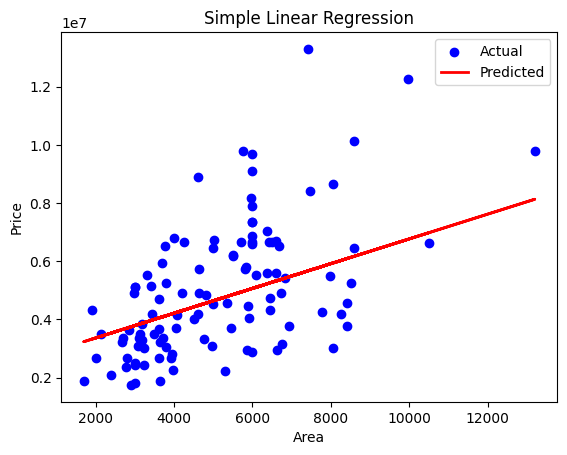

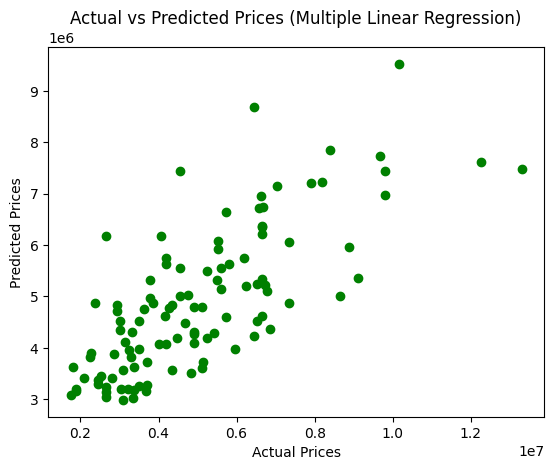

In [11]:
#Step 6: Plot Regression Lines

#Simple Linear Regression Plot
plt.scatter(X_test_simple, y_test_simple, color='blue', label='Actual')
plt.plot(X_test_simple, y_pred_simple, color='red', linewidth=2, label='Predicted')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

#Multiple Linear Regression - Actual vs Predicted
plt.scatter(y_test_multi, y_pred_multi, color='green')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices (Multiple Linear Regression)")
plt.show()


In [12]:
#Step 7: Interpret Coefficients

#Simple Linear Regression Coefficients
print("\nSimple Linear Regression Coefficients:")
print(f"Intercept: {simple_model.intercept_}")
print(f"Coefficient for Area: {simple_model.coef_[0]}")

#Multiple Linear Regression Coefficients
print("\nMultiple Linear Regression Coefficients:")
print(f"Intercept: {multi_model.intercept_}")
coefficients_df = pd.DataFrame({
    'Feature': features_multi,
    'Coefficient': multi_model.coef_
})
print(coefficients_df)


Simple Linear Regression Coefficients:
Intercept: 2512254.2639593435
Coefficient for Area: 425.72984193878284

Multiple Linear Regression Coefficients:
Intercept: 51999.67680883873
     Feature   Coefficient
0       area  3.088670e+02
1   bedrooms  1.512468e+05
2  bathrooms  1.185732e+06
3    stories  4.951008e+05
4    parking  3.376608e+05


In [13]:
#Summary Table
print("\nSummary:")
summary_table = pd.DataFrame({
    'Model': ['Simple Linear Regression', 'Multiple Linear Regression'],
    'MAE': [mae_simple, mae_multi],
    'MSE': [mse_simple, mse_multi],
    'R-squared': [r2_simple, r2_multi]
})
print(summary_table)


Summary:
                        Model           MAE           MSE  R-squared
0    Simple Linear Regression  1.474748e+06  3.675287e+12   0.272879
1  Multiple Linear Regression  1.127483e+06  2.292722e+12   0.546406
